<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj5/wykrywanie_elementow_odstajacych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# **Elementy odstające (*ang. outliers*)**

**Elementy odstające** to punkty danych znalazujące się w znacznej odległości od grupy innych punktów - byty wyróżniające się z tłumu.

Problemy spowodowane outliersami:

* Długi czas uczenia modelu predykcyjnego
* Kiepska dokładność predykcji
* Zwiększenie błędu wariancji
* Zmniejszenie normalności rozkładu danych
* Osłabienie mocy testów statystycznych

## Typy elementów odstających

**1. OUTLIERSY JEDNOWYMIAROWE**

  * Występują w rozkładach opisujących jedną zmienną
  
  * Przykład: wynagrodzenia pracowników w jednej firmie
  
  * Łatwo widoczne na histogramach i wykresach pudełkowych

**2. OUTLIERSY WIELOWYMIAROWE**

 * Znajdują się w przestrzeniach n-wymiarowych

 * Przykład: dane klientów (wiek, dochód, wydatki)

 * Trudniejsze do wykrycia bez specjalnych metod

# **Metody wykrywania elementów odstających**

### **Metoda 1**: Wykres pudełkowy


* Tworzy podział punktów ze względu na kwartyle (Q1, Q2, Q3)

* Dane między Q1 a Q3 umieszczane w prostokątnych pudełkach

* Elementy odstające wyświetlane jako pojedyncze punkty poza pudełkiem

* Pokazuje rozstęp ćwiartkowy (IQR)

**Zalety**:

* Wizualna reprezentacja

* Szybkie zidentyfikowanie outliersów

* Porównanie wielu zmiennych



### **Metoda 2**: Wykres punktowy

* Wyświetla punkty na dwuwymiarowym układzie współrzędnych
* Jedna zmienna na osi X, druga na osi Y
* Idealny do wizualizacji relacji między dwoma zmiennymi
* Anomalie widoczne jako izolowane punkty daleko od klastera

**Zalety**:

* Łatwa identyfikacja outlierów wielowymiarowych
* Wizualna analiza trendów
* Pokazuje korelacje między zmiennymi

### **Metoda 3**: Wynik standaryzowany Z-score
**Formuła:**

z = (x - μ) / σ

Gdzie:

x = wartość danych,

μ = średnia (mean),

σ = odchylenie standardowe (standard deviation)

**Reguła**:

|z| > 3 → element odstający (99.7% danych powinno mieć |z| ≤ 3)

|z| > 2.5 → potencjalny outlier

**Założenia:**

* Rozkład normalny danych

* Metoda parametryczna

### **Metoda 4**: Rozstęp ćwiartkowy (IQR)
**Formuła:**
  IQR = Q3 - Q1

Gdzie: Q1 = pierwszy kwartyl (25. percentyl), Q3 = trzeci kwartyl (75. percentyl)

**Zasada outliersów**:

* Dolny limit: Q1 - 1.5 × IQR

* Górny limit: Q3 + 1.5 × IQR

* Wartości poza limitami = outliersy

**Zalety**:

* Odporna miara (mało wrażliwa na ekstrema)
* Nie wymaga założenia o rozkładzie normalnym
* Metoda nieparametryczna



### **Metoda 5**: Percentyl

**Percentyl** dzieli dane na 100 grup o równych rozmiarach. Wartość percentyla określa procent populacji znajdujący się poniżej tej wartości.

**Przykłady**:

* 1. percentyl: bardzo niskie wartości
* 50. percentyl: mediana
* 99. percentyl: bardzo wysokie wartości



**Reguła outliersów**:

* Wartości poniżej 1. percentyla → outliersy niskie
* Wartości powyżej 99. percentyla → outliersy wysokie
* Można również użyć 5. i 95. percentyla

## **PODSUMOWANIE**

1. **CO TO OUTLIER?**
   
   Punkt danych daleko od głównej grupy, wyróżniający się z tłumu

2. **DLACZEGO WAŻNY?**
   
   Psuje modele, zmniejsza dokładność, zwiększa błąd

3. **METODY WYKRYWANIA:**

    * Boxplot (wykres pudełkowy)

    * Scatter plot (wykres punktowy)

    * Z-score (standaryzacja)

    * IQR (rozstęp ćwiartkowy)

    * Percentyle

4. **KLUCZOWE TERMINY:**
Q1, Q3, IQR, σ (sigma), μ (mu), z-score, outlier

## **Przykład praktyczny**

**Dane**:
Wynagrodzenia pracowników (tys. zł): 2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0


In [52]:
# Dane: wynagrodzenia (tys. zł)
dane = np.array([-15, -10, 2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 10.0, 50.0])
print("\n1. DANE TESTOWE:")
print(f"   Wynagrodzenia: {dane}")
print(f"   Liczba obserwacji: {len(dane)}")


1. DANE TESTOWE:
   Wynagrodzenia: [-15.  -10.    2.5   2.8   3.    3.2   3.5   4.    4.2   4.5   5.   10.
  50. ]
   Liczba obserwacji: 13


In [53]:
print("\n" + "="*50)
print("METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)")
print("="*50)

Q1 = np.percentile(dane, 25)
Q3 = np.percentile(dane, 75)
IQR = Q3 - Q1
dolny_limit = Q1 - 1.5 * IQR
gorny_limit = Q3 + 1.5 * IQR

print(f"\nQ1 (25. percentyl) = {Q1:.2f}")
print(f"Q3 (75. percentyl) = {Q3:.2f}")
print(f"IQR = Q3 - Q1 = {IQR:.2f}")
print(f"\nLimity dla outliersów:")
print(f"  Dolny limit = Q1 - 1.5 × IQR = {Q1:.2f} - 1.5 × {IQR:.2f} = {dolny_limit:.2f}")
print(f"  Górny limit = Q3 + 1.5 × IQR = {Q3:.2f} + 1.5 × {IQR:.2f} = {gorny_limit:.2f}")

outliersy_iqr = dane[(dane < dolny_limit) | (dane > gorny_limit)]
print(f"\n✓ OUTLIERSY WYKRYTE (metoda IQR): {outliersy_iqr}")


METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)

Q1 (25. percentyl) = 2.80
Q3 (75. percentyl) = 4.50
IQR = Q3 - Q1 = 1.70

Limity dla outliersów:
  Dolny limit = Q1 - 1.5 × IQR = 2.80 - 1.5 × 1.70 = 0.25
  Górny limit = Q3 + 1.5 × IQR = 4.50 + 1.5 × 1.70 = 7.05

✓ OUTLIERSY WYKRYTE (metoda IQR): [-15. -10.  10.  50.]


In [54]:
print("\n" + "="*50)
print("METODA 2: Z-SCORE")
print("="*50)

srednia = np.mean(dane)
std_dev = np.std(dane, ddof=1)  # ddof=1 dla próby - używane, gdy chcesz obliczyć odchylenie standardowe próby (a nie całej populacji)
z_scores = np.abs(stats.zscore(dane))

print(f"\nŚrednia (μ) = {srednia:.2f}")
print(f"Odchylenie standardowe (σ) = {std_dev:.2f}")
print(f"\nFormuła: z = (x - μ) / σ")
print(f"\nZ-score dla każdej wartości:")

for i, (wartosc, z) in enumerate(zip(dane, z_scores)):
    status = " ⚠️ OUTLIER" if z > 3 else ""
    print(f"  {wartosc:5.1f} → z = {z:5.2f}{status}")

outliersy_z = dane[z_scores > 3]
print(f"\n✓ OUTLIERSY WYKRYTE (z > 3): {outliersy_z}")


METODA 2: Z-SCORE

Średnia (μ) = 5.21
Odchylenie standardowe (σ) = 14.99

Formuła: z = (x - μ) / σ

Z-score dla każdej wartości:
  -15.0 → z =  1.40
  -10.0 → z =  1.06
    2.5 → z =  0.19
    2.8 → z =  0.17
    3.0 → z =  0.15
    3.2 → z =  0.14
    3.5 → z =  0.12
    4.0 → z =  0.08
    4.2 → z =  0.07
    4.5 → z =  0.05
    5.0 → z =  0.01
   10.0 → z =  0.33
   50.0 → z =  3.11 ⚠️ OUTLIER

✓ OUTLIERSY WYKRYTE (z > 3): [50.]


In [55]:
print("\n" + "="*50)
print("METODA 3: PERCENTYL")
print("="*50)

p1 = np.percentile(dane, 1)
p99 = np.percentile(dane, 99)
p5 = np.percentile(dane, 5)
p95 = np.percentile(dane, 95)

print(f"\n1. percentyl = {p1:.2f}")
print(f"5. percentyl = {p5:.2f}")
print(f"95. percentyl = {p95:.2f}")
print(f"99. percentyl = {p99:.2f}")

print(f"\nOutliersy poniżej 1. percentyla: {dane[dane < p1]}")
print(f"Outliersy poniżej 5. percentyla: {dane[dane < p5]}")
print(f"Outliersy powyżej 95. percentyla: {dane[dane > p95]}")
print(f"Outliersy powyżej 99. percentyla: {dane[dane > p99]}")


METODA 3: PERCENTYL

1. percentyl = -14.40
5. percentyl = -12.00
95. percentyl = 26.00
99. percentyl = 45.20

Outliersy poniżej 1. percentyla: [-15.]
Outliersy poniżej 5. percentyla: [-15.]
Outliersy powyżej 95. percentyla: [50.]
Outliersy powyżej 99. percentyla: [50.]


In [56]:
print("\n" + "="*50)
print("PODSUMOWANIE - PORÓWNANIE METOD")
print("="*50)

print(f"\n{'Metoda':<25} {'Wykryte outliersy':<30} {'Liczba'}")
print("-" * 50)
print(f"{'IQR':<25} {str(outliersy_iqr):<30} {len(outliersy_iqr)}")
print(f"{'Z-score (|z| > 3)':<25} {str(outliersy_z):<30} {len(outliersy_z)}")
print(f"{'Percentyl (1-99%)':<25} {str(dane[(dane < p1) | (dane > p99)]):<30} {len(dane[(dane < p1) | (dane > p99)])}")
print(f"{'Percentyl (5-95%)':<25} {str(dane[(dane < p5) | (dane > p95)]):<30} {len(dane[(dane < p5) | (dane > p95)])}")


PODSUMOWANIE - PORÓWNANIE METOD

Metoda                    Wykryte outliersy              Liczba
--------------------------------------------------
IQR                       [-15. -10.  10.  50.]          4
Z-score (|z| > 3)         [50.]                          1
Percentyl (1-99%)         [-15.  50.]                    2
Percentyl (5-95%)         [-15.  50.]                    2


In [57]:
print("\n" + "="*50)
print("PRZYKŁAD 2: DANE WIELOWYMIAROWE")
print("="*50)

dane_2d = np.array([
    [25, 30000],  # wiek, dochód (tys. zł)
    [27, 32000],
    [26, 31000],
    [28, 33000],
    [30, 35000],
    [28, 250000],  # ← OUTLIER!
])

df = pd.DataFrame(dane_2d, columns=['Wiek', 'Dochód'])
print("\nDane klientów (Wiek, Dochód w tys. zł):")
print(df.to_string(index=False))

# Z-score dla każdej kolumny
z_scores_wiek = np.abs(stats.zscore(df['Wiek']))
z_scores_dochod = np.abs(stats.zscore(df['Dochód']))

outliersy_2d = df[(z_scores_wiek > 2) | (z_scores_dochod > 2)]
print(f"\n✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):")
print(outliersy_2d)


PRZYKŁAD 2: DANE WIELOWYMIAROWE

Dane klientów (Wiek, Dochód w tys. zł):
 Wiek  Dochód
   25   30000
   27   32000
   26   31000
   28   33000
   30   35000
   28  250000

✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):
   Wiek  Dochód
5    28  250000


## Wizualizacja analizy

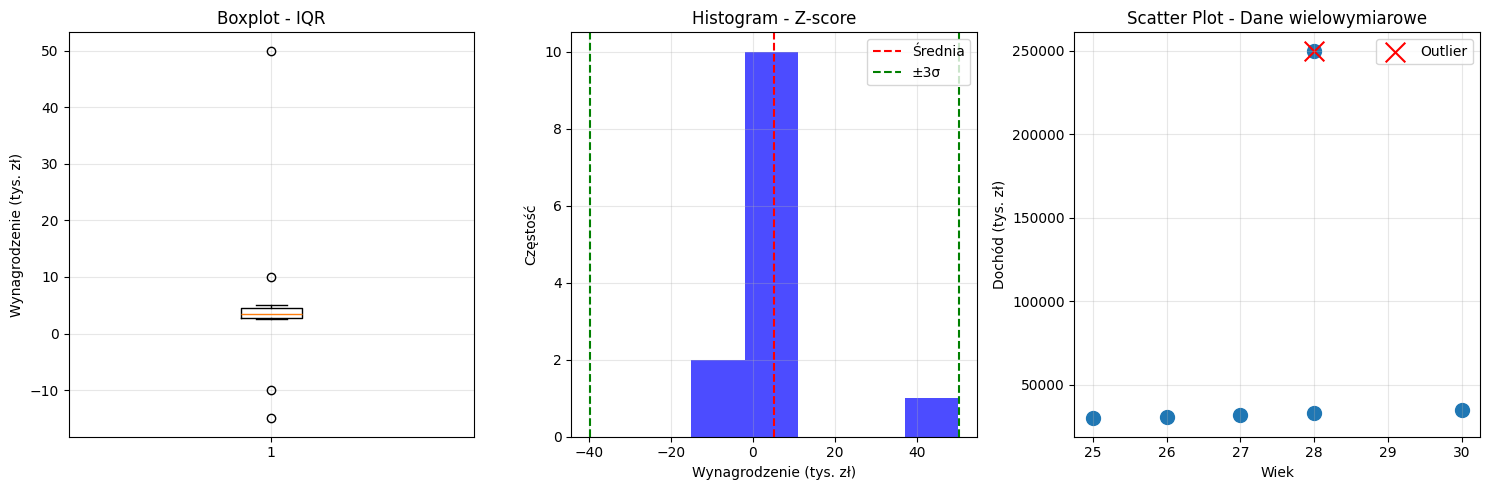

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(dane)
plt.ylabel('Wynagrodzenie (tys. zł)')
plt.title('Boxplot - IQR')
plt.grid(True, alpha=0.3)

# Histogram z Z-score
plt.subplot(1, 3, 2)
plt.hist(dane, bins=5, alpha=0.7, color='blue')
plt.axvline(srednia, color='red', linestyle='--', label='Średnia')
plt.axvline(srednia + 3*std_dev, color='green', linestyle='--', label='±3σ')
plt.axvline(srednia - 3*std_dev, color='green', linestyle='--')
plt.xlabel('Wynagrodzenie (tys. zł)')
plt.ylabel('Częstość')
plt.title('Histogram - Z-score')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plot 2D
plt.subplot(1, 3, 3)
plt.scatter(dane_2d[:, 0], dane_2d[:, 1], s=100)
plt.scatter(dane_2d[-1, 0], dane_2d[-1, 1], color='red', s=200, marker='x', label='Outlier')
plt.xlabel('Wiek')
plt.ylabel('Dochód (tys. zł)')
plt.title('Scatter Plot - Dane wielowymiarowe')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Zadanie 1**


Pracujesz w firmie zajmującej się e-commerce. Otrzymałeś dane o sprzedaży
dziennej (liczba sztuk) z ostatnich 30 dni.


ZADANIE:
- Wczytaj dane sprzedażowe
- Zrób wizualizację danych
- Zastosuj metodę IQR, z-score oraz opartą na percentylach (1-99%)
- Zidentyfikuj outliersów
- Wyjaśnij co mogło się stać



    Unnamed: 0  dzien  sprzedaz dzien_tygodnia
0            0      1        65             Pn
1            1      2        71             Wt
2            2      3        69             Sr
3            3      4        73             Cz
4            4      5        74             Pt
5            5      6        44             Sb
6            6      7        41             Nd
7            7      8        71             Pn
8            8      9        72             Wt
9            9     10        70             Sr
10          10     11        73             Cz
11          11     12        75             Pt
12          12     13        42             Sb
13          13     14        36             Nd
14          14     15        64             Pn
15          15     16        69             Wt
16          16     17        71             Sr
17          17     18        72             Cz
18          18     19       348             Pt
19          19     20        40             Sb
20          2

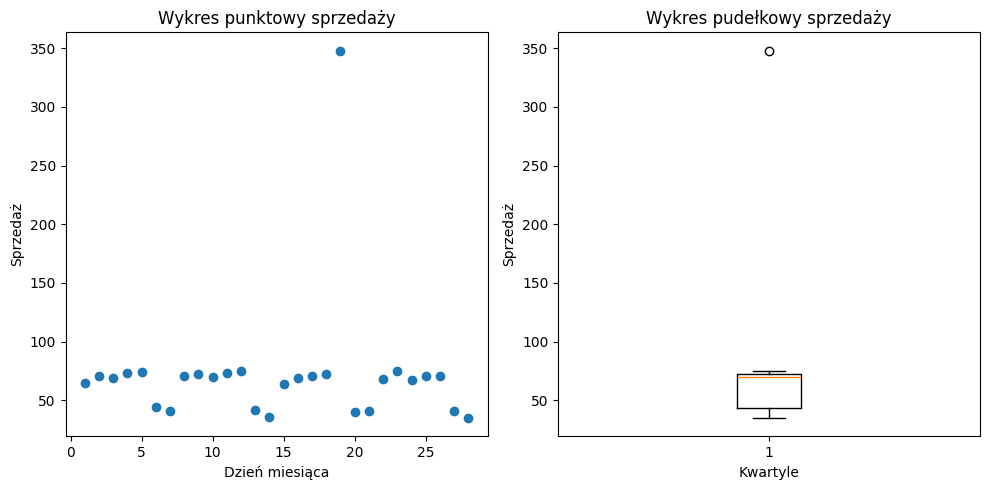

In [59]:
dane = pd.read_csv("sprzedaz_dzienna.csv")
dane_sprzedaz = np.array(dane["sprzedaz"])

print(dane)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(dane['dzien'], dane['sprzedaz'])
axes[0].set_xlabel('Dzień miesiąca')
axes[0].set_ylabel('Sprzedaż')
axes[0].set_title('Wykres punktowy sprzedaży')

axes[1].boxplot(dane['sprzedaz'])
axes[1].set_xlabel('Kwartyle')
axes[1].set_ylabel('Sprzedaż')
axes[1].set_title('Wykres pudełkowy sprzedaży')

plt.tight_layout()

In [60]:
# METODA IQR
Q1 = np.percentile(dane_sprzedaz, 25)
Q3 = np.percentile(dane_sprzedaz, 75)
IQR = Q3 - Q1
dolny_limit = Q1 - 1.5 * IQR
gorny_limit = Q3 + 1.5 * IQR

outliersy_iqr = dane_sprzedaz[(dane_sprzedaz < dolny_limit) | (dane_sprzedaz > gorny_limit)]

print(f"\n✓ OUTLIERY WYKRYTE (metoda IQR): {outliersy_iqr}")


✓ OUTLIERY WYKRYTE (metoda IQR): [348]


In [61]:
# METODA Z-SCORE
srednia = dane_sprzedaz.mean()
std_dev = dane_sprzedaz.std()

z_scores = np.abs((dane_sprzedaz - srednia) / std_dev)

outliers_z = dane_sprzedaz[z_scores > 3]

print(f"\n✓ OUTLIERY WYKRYTE (z > 3): {outliers_z}")


✓ OUTLIERY WYKRYTE (z > 3): [348]


In [62]:
# METODA PERCENTYLE
p1 = np.percentile(dane_sprzedaz, 1)
p99 = np.percentile(dane_sprzedaz, 99)

outliers_percentyle = dane_sprzedaz[(dane_sprzedaz < p1) | (dane_sprzedaz > p99)]

print(f"\n✓ OUTLIERY WYKRYTE (1-99%): {outliers_percentyle}")


✓ OUTLIERY WYKRYTE (1-99%): [348  35]


In [63]:
outliers = np.unique(np.concatenate((outliersy_iqr, outliers_z, outliers_percentyle)))

print(f"\n✓ OUTLIERY WYKRYTE (wszystkie metody): {outliers}")


✓ OUTLIERY WYKRYTE (wszystkie metody): [ 35 348]


Patrząc na wykresy, element 35 nie powinien być brany po uwagę jako odstający. Jest on na liście tylko dlatego, że jest skrajną wartością, co znaczy, że jest poza percentylem 1% a percentylem 99%. Jedyną realną wartością odstającą jest 348, która może być spowodowana błędnym wpisaniem danych lub jednodniową promocją, która wywołała taki ruch w piątek.

## **Zadanie 2**

Jesteś analitykiem w banku. Otrzymałeś dane o klientach zaciągających kredyty.
Każdy klient ma 4 cechy:
  1. Wiek (lata)
  2. Dochód roczny (tys. PLN)
  3. Suma kredytów (tys. PLN)
  4. Liczba lat jako klient

Do zrobienia:
- Zidentyfikować klientów wielowymiarowych outliersów
- Użyj metody z-score dla każdego wymiaru osobno



    id    wiek   dochód    kredyt  lata jako klient
0    0   53.18    80.63     65.34             12.99
1    1   41.28    75.23    218.69              3.96
2    2   48.89    87.45    145.27              2.99
3    3   43.44    64.46    212.89              7.93
4    4   46.16    91.39     71.28              9.25
5    5   52.14   111.65    121.03              8.00
6    6   35.18    78.82    151.26              1.90
7    7   70.11    89.03    153.35              7.83
8    8   32.93    94.80    128.50              4.19
9    9   30.43    72.98    182.14             10.11
10  10   58.90    85.48     97.62              9.20
11  11   54.50    81.25    143.88              5.28
12  12   52.49    82.95    157.01              6.56
13  13   52.54    65.54    176.72              4.92
14  14   44.85    81.49    186.58              7.91
15  15   34.23    90.96     94.77             10.97
16  16   45.91   110.02     74.29              5.14
17  17   36.87   100.19    214.88              9.61
18  18   56.

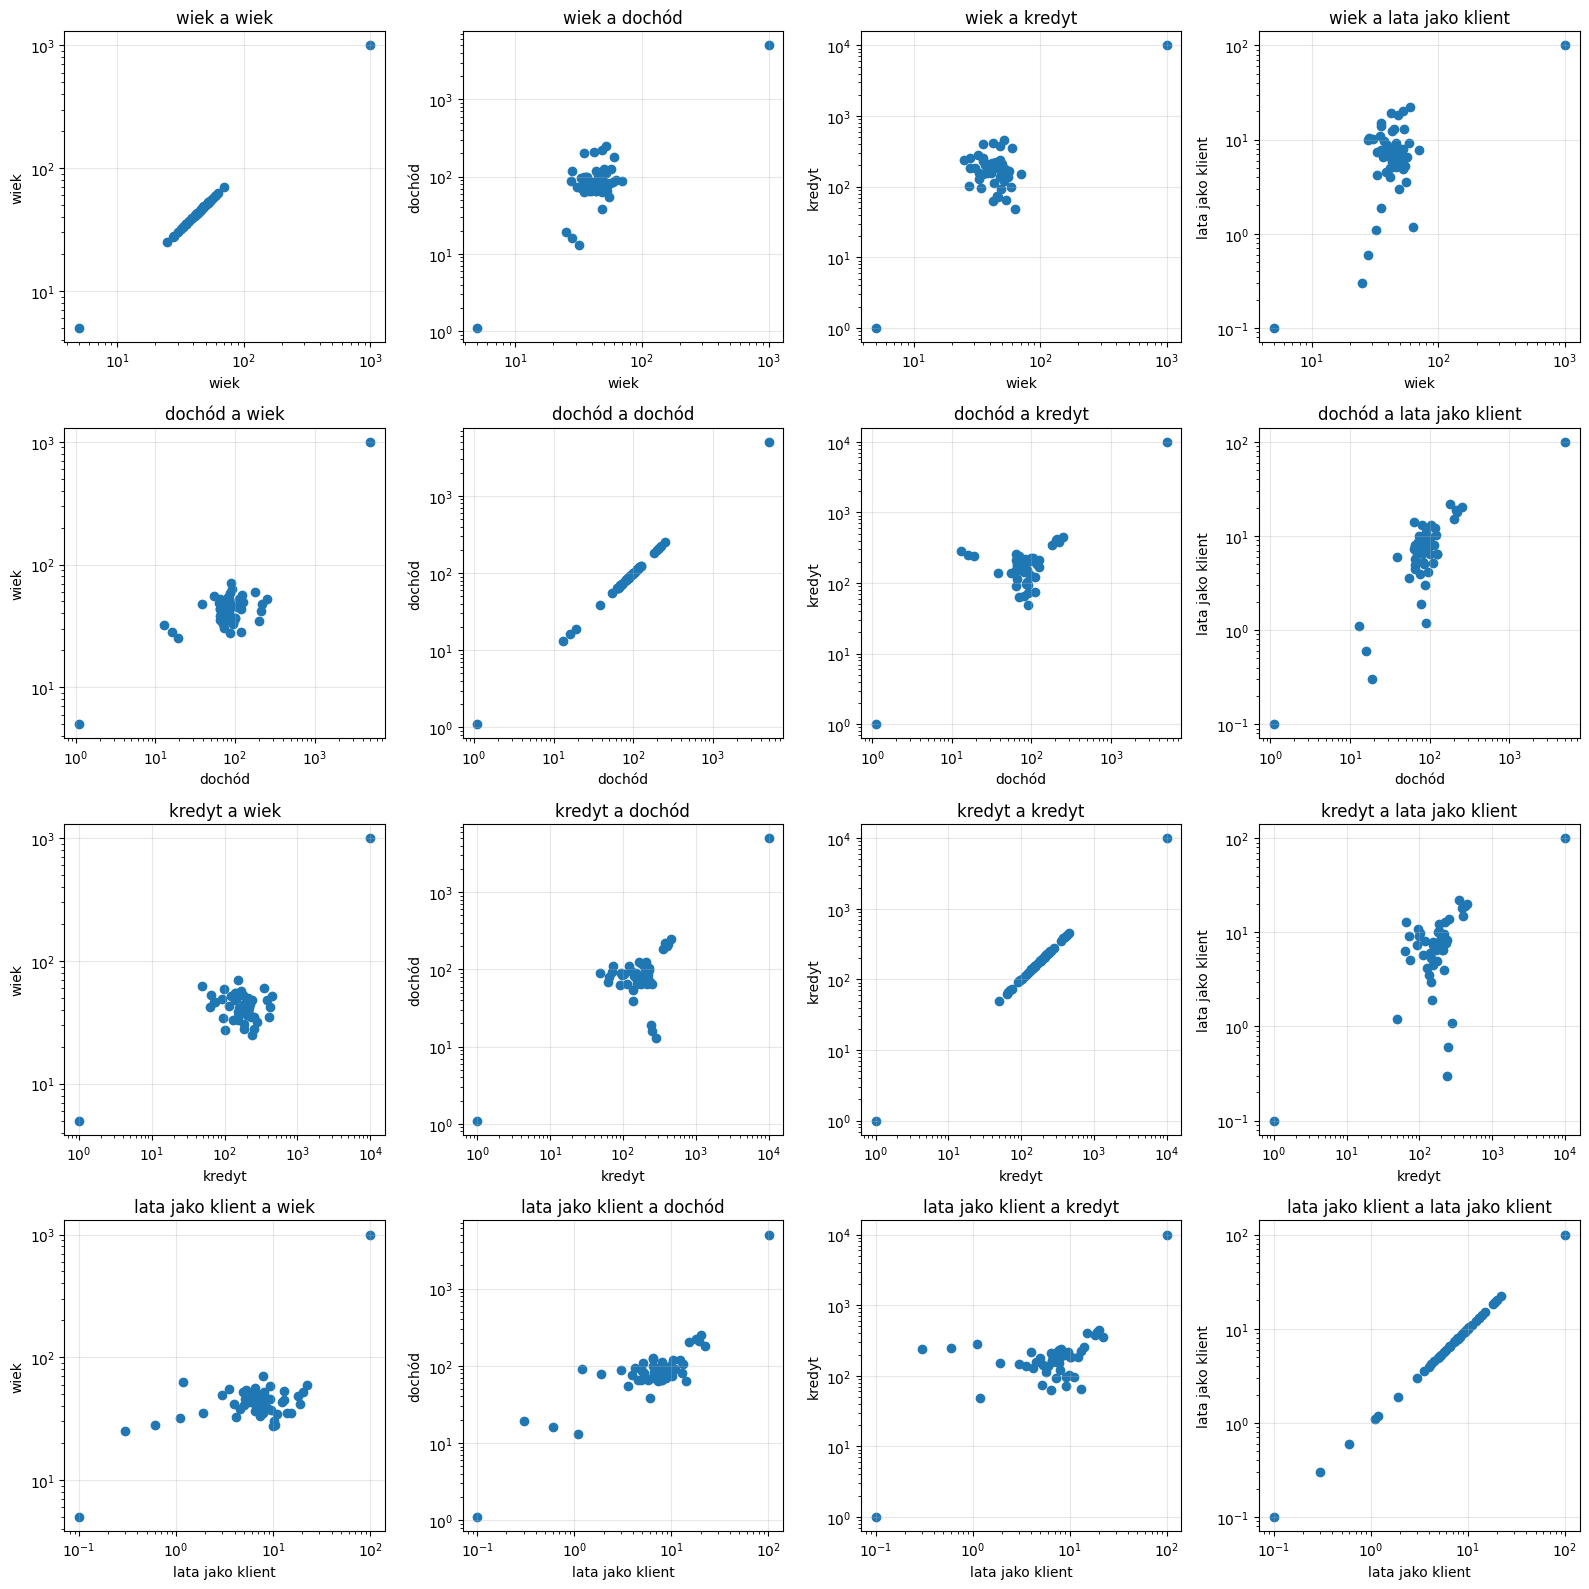

In [64]:
dane = pd.read_csv("klienci_banku.csv", skiprows=1, names=["id", "wiek", "dochód", "kredyt", "lata jako klient"])

print(dane)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    x_col_idx = i // 4 + 1
    y_col_idx = i % 4 + 1
    x_data = dane.iloc[:, x_col_idx]
    y_data = dane.iloc[:, y_col_idx]
    ax.scatter(x_data, y_data)
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim(0, 500)
    # ax.set_ylim(0, 500)
    ax.set_xlabel(dane.columns[x_col_idx])
    ax.set_ylabel(dane.columns[y_col_idx])
    ax.set_title(f"{dane.columns[x_col_idx]} a {dane.columns[y_col_idx]}")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
# METODA Z-SCORE
outliers = {}

for i in range(1, 5):
    dane_kolumna = dane.iloc[:, i]
    srednia = dane_kolumna.mean()
    std_dev = dane_kolumna.std()

    z_scores = np.abs((dane_kolumna - srednia) / std_dev)

    outliers[dane.columns[i]] = dane[z_scores > 3]

    print(f"\nKolumna: {dane.columns[i]}:")
    print(f"Średnia: {srednia:.2f}")
    print(f"Odchylenie standardowe: {std_dev:.2f}")

    # for j, (wartosc, z) in enumerate(zip(dane_kolumna, z_scores)):
    #     print(f"{j}. {wartosc:5.2f} → z = {z:5.2f}")

    print(f"\n✓ OUTLIERY WYKRYTE (z > 3) dla {dane.columns[i]}:")
    print(outliers[dane.columns[i]])


Kolumna: wiek:
Średnia: 62.07
Odchylenie standardowe: 135.67

✓ OUTLIERY WYKRYTE (z > 3) dla wiek:
    id   wiek  dochód   kredyt  lata jako klient
48  48  999.0  5001.0  10001.0             100.1

Kolumna: dochód:
Średnia: 189.84
Odchylenie standardowe: 696.03

✓ OUTLIERY WYKRYTE (z > 3) dla dochód:
    id   wiek  dochód   kredyt  lata jako klient
48  48  999.0  5001.0  10001.0             100.1

Kolumna: kredyt:
Średnia: 380.82
Odchylenie standardowe: 1391.47

✓ OUTLIERY WYKRYTE (z > 3) dla kredyt:
    id   wiek  dochód   kredyt  lata jako klient
48  48  999.0  5001.0  10001.0             100.1

Kolumna: lata jako klient:
Średnia: 9.83
Odchylenie standardowe: 13.94

✓ OUTLIERY WYKRYTE (z > 3) dla lata jako klient:
    id   wiek  dochód   kredyt  lata jako klient
48  48  999.0  5001.0  10001.0             100.1
